Sources: 
https://www.kaggle.com/competitions/spaceship-titanic


## Porpouse of the work

Estudo dos dados do Spaceship Titanic que pode ser encontrado no site kaggle, ao entrar no site você encontrara informações sobre os dados e os links para download. Os dados estão em formato CSV, estão divididos 3 sendo o train.csv o conjunto de dados que você irá utilizar para treinar o seu modelo, test.csv é o conjunto de dados que você irá utilizar para prever se o passageiro foi transportado ou não e fazer a sua respectiva submissão, para saber quais padrões adotar para isto temos o terceiro arquivo que é o sample_submission.csv que contém a quantidade e o formato de envio. Neste estudo irei fazer testes e postar os seus respectivos resultados com o intuito de elevar o nível desta competição já que temos muitos exemplos de resultados, mas não encontrei nenhum que detalhasse a ponto de deixar uma base solida e uma perspectiva de continuidade e com exemplos de falhas para que evite que se as cometa de novo. 

Para iniciar será feito o teste base, que consiste em utilizar somente os dados numéricos com tratamentos básicos de média para todos os valores ausentes para verificarmos o valor base de acertos. A métrica utilizada para medir os acertos do nosso modelo será a acurácia por ser o modelo mais fácil de se entender, sua fórmula é acurácia=(Total de acertos)/(Total de elementos). Após este primeiro teste iremos adicionando variáveis categóricas, os valores ausentes serão tratados com o cálculo de moda, após esses testes bases serão utilizados outros métodos, inclusive os de aprendizado de máquina para preenchimento desses valores, serão gerados também Matrizes de confusão para os respectivos testes. 

O ambiente de desenvolvimento escolhido foi o Jupyter Notebook com e a linguagem de programação Python, para manipular o dataset foi utilizado numpy e pandas e para gerar graficos foi utilizado o matplotlib e o seaborn, para o treinamento do modelo foram utilizados o Random Forest Classifier e o Gradient Boosting Classifier. 

# About the data

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
#Explore dataframe
import numpy
import pandas

# Datavisualization
from matplotlib import pyplot as plt
import seaborn

#Dataset treatment
from sklearn.preprocessing import OrdinalEncoder

#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# ML 2 model
import xgboost as xg

##
import warnings
warnings.filterwarnings("ignore")

In [2]:
def nanValues(dataframe):
    missingValuesColumnsCount = dataframe.isnull().sum()
    totalCels = numpy.product(dataframe.shape)
    totalMissing = missingValuesColumnsCount.sum()
    percentValuesMissing = (totalMissing/totalCels)*100
    print("Percent of nan values:",percentValuesMissing)
    print("\nQuantite of nan values:\n",missingValuesColumnsCount)

In [3]:
def percentColumnNullValues(dataframe):
    columns = dataframe.columns
    nanColumns = []
    for column in columns:
        if (dataframe[column].isnull().sum() / dataframe[column].shape[0] )*100 > 0:
            print(column)
            print((dataframe[column].isnull().sum() / dataframe[column].shape[0] )*100)
            if column not in nanColumns:
                nanColumns.append(column)

In [4]:
def replaceNanValuesToMean(dataframe):
    dataframe.fillna(dataframe.mean(), inplace = True)
    return dataframe

In [5]:
def getPassengerIdNumber(dataframe):
    var = []
    for i in range(len(dataframe)):
        var.append(int(dataframe[:][i][0:4]))
    return var

In [7]:
train_dataframe = pandas.read_csv("train.csv")
test_dataframe = pandas.read_csv("test.csv")

In [8]:
train_dataframe.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
imutPassengerID = test_dataframe['PassengerId'].copy()
PassengerID = test_dataframe['PassengerId']
imutPassengerID

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [8]:
columns_train_qualitative = [i for i in train_dataframe.columns if train_dataframe.dtypes[i] == 'object']
columns_train_quantitative = [i for i in train_dataframe.columns if train_dataframe.dtypes[i] != 'object']

In [9]:
columns_test_qualitative = [i for i in test_dataframe.columns if test_dataframe.dtypes[i] == 'object']
columns_test_quantitative = [i for i in test_dataframe.columns if test_dataframe.dtypes[i] != 'object']

In [11]:
nanValues(train_dataframe[columns_train_quantitative])

Percent of nan values: 1.8438480879525396

Quantite of nan values:
 Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64


In [12]:
nanValues(test_dataframe[columns_test_quantitative])

Percent of nan values: 2.1744213233574934

Quantite of nan values:
 Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64


In [13]:
train_dataframe= train_dataframe[columns_train_quantitative]
test_dataframe = test_dataframe[columns_test_quantitative]

<AxesSubplot:>

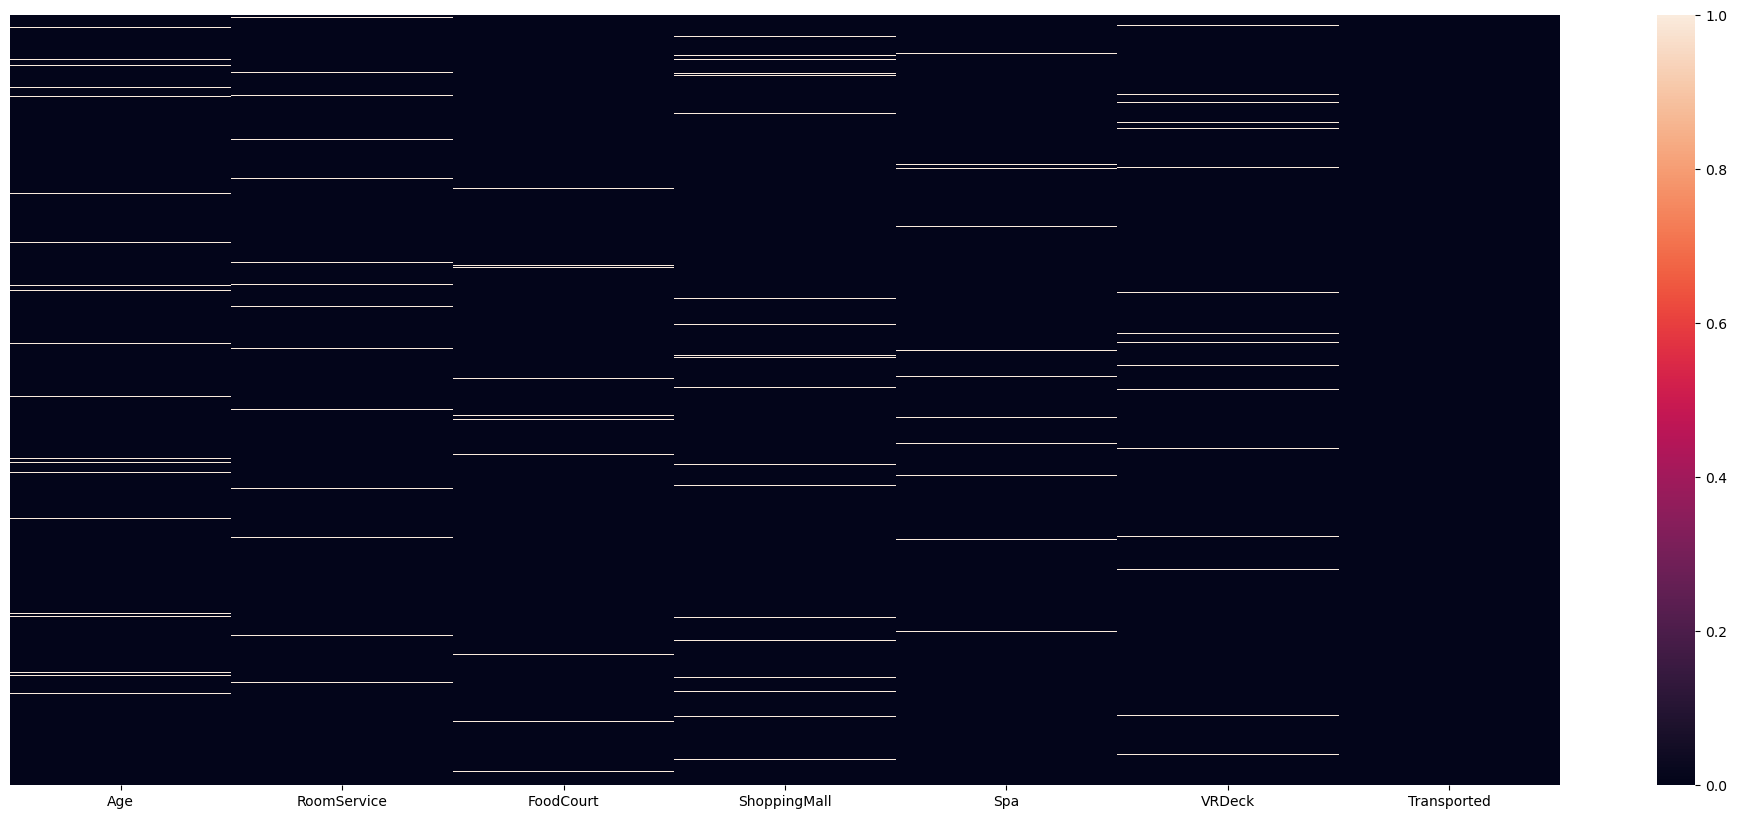

In [14]:
fig, ax = plt.subplots(figsize=(25,10))
seaborn.heatmap(data=train_dataframe.isnull(), yticklabels=False, ax=ax)

In [15]:
percentColumnNullValues(train_dataframe)

Age
2.0591280340503855
RoomService
2.082135051190613
FoodCourt
2.105142068330841
ShoppingMall
2.392729782583688
Spa
2.105142068330841
VRDeck
2.1626596111814105


In [16]:
train_dataframe['Age'].fillna(train_dataframe['Age'].mean(), inplace = True)
train_dataframe['RoomService'] = replaceNanValuesToMean(train_dataframe['RoomService'])
train_dataframe['FoodCourt'].fillna(0, inplace = True)
train_dataframe['ShoppingMall'].fillna(0, inplace = True)
train_dataframe['Spa'] = replaceNanValuesToMean(train_dataframe['Spa'])
train_dataframe['VRDeck'] = replaceNanValuesToMean(train_dataframe['VRDeck'])

test_dataframe['Age'].fillna(test_dataframe['Age'].mean(), inplace = True)
test_dataframe['RoomService']= replaceNanValuesToMean(test_dataframe['RoomService'])
test_dataframe['FoodCourt'].fillna(0, inplace = True)
test_dataframe['ShoppingMall'].fillna(0, inplace = True)
test_dataframe['Spa'] = replaceNanValuesToMean(test_dataframe['Spa'])
test_dataframe['VRDeck'] = replaceNanValuesToMean(test_dataframe['VRDeck'])

In [17]:
percentColumnNullValues(train_dataframe)

In [18]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

Transported     1.000000
Age            -0.069664
FoodCourt      -0.176139
ShoppingMall   -0.215192
VRDeck         -0.341068
Spa            -0.363079
RoomService    -0.364071
Name: Transported, dtype: float64

Transported     1.000000

CryoSleep       0.460132

VIP            -0.037261

Age            -0.069664

FoodCourt      -0.176139

ShoppingMall   -0.215192

VRDeck         -0.341068

Spa            -0.363079

RoomService    -0.364071


# Machine learning

In [19]:
features = train_dataframe.drop("Transported",axis=1)
target = train_dataframe["Transported"]
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=22)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6085, 6), (2608, 6), (6085,), (2608,))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 77.65
The cross validated score for Random Forest Classifier is: 78.95


Text(0.5, 1.05, 'Random Forest Classifier')

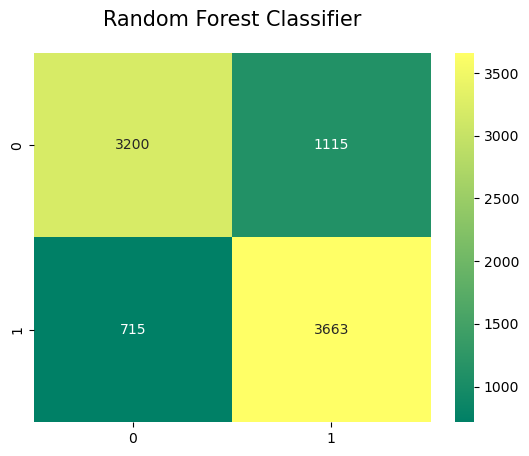

In [20]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

#n_estimators its exemples quantite that we will use in the training
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

#Model training
model.fit(X_train,y_train)
#model prediction with 0 or 1 of result
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))

kfold = KFold(n_splits=5, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,features,target,cv=10,scoring='accuracy')

print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(model,features,target,cv=10)
seaborn.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Random Forest Classifier', y=1.05, size=15)

In [21]:
from sklearn.metrics import accuracy_score # importando a biblioteca para calcular a acurácia
acuracia = accuracy_score(target, y_pred)
print('Acurácia: %f' % acuracia)

Acurácia: 0.789486


The accuracy of the Random Forest Classifier is 79.72

The cross validated score for Random Forest Classifier is: 76.14

In [22]:
#train_dataframe=train_dataframe.drop("PassengerId", axis=1)
train_X = train_dataframe.drop("Transported", axis=1)
train_Y= train_dataframe["Transported"]
test_X  = test_dataframe.copy()
train_X.shape, train_Y.shape, test_X.shape

((8693, 6), (8693,), (4277, 6))

Accuracy  89.26


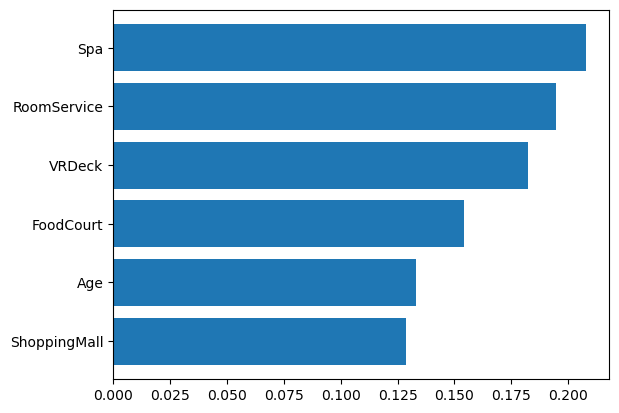

In [23]:
# Random Forests
random_forest = RandomForestClassifier(class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2',
            min_samples_leaf=2, min_samples_split=4,
            n_estimators=500, n_jobs=1,
            warm_start=True)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)#predições
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

pandas.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print("Accuracy ",acc_random_forest)

submission = pandas.DataFrame({
        "PassengerId": PassengerID,
        "Transported": Y_pred_rf})

submission.to_csv('MySubmissionFutureTitanicRandonForest01.csv', index=False)

In [24]:
print('Acurácia: %f' % acc_random_forest)

Acurácia: 89.260000


In [25]:
"Accuracy  95.25"

'Accuracy  95.25'

--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 77.49
The cross validated score for AdaBoostClassifier is: 78.99


Text(0.5, 1.05, 'Gradient Boosting Classifier')

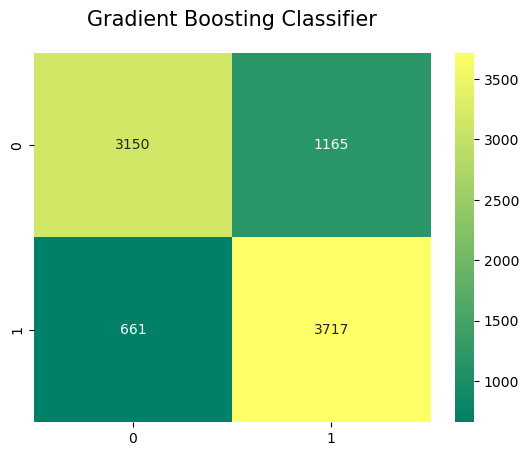

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,features,target,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,features,target,cv=10)
seaborn.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Gradient Boosting Classifier', y=1.05, size=15)

The accuracy of the Gradient Boosting Classifier is 77.99

The cross validated score for AdaBoostClassifier is: 73.58

In [27]:
y = train_dataframe['Transported']
X = train_dataframe.drop(['Transported'], axis=1)
baseline = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0)
acc_random_forest = round(model.score(X, y) * 100, 2)
print("Acuracia :",acc_random_forest)

Acuracia : 79.98


name deleted XGB avg: 0.40908364267848996

name by OE XGB avg: 0.41514623825816344

In [28]:
#Ate o presente momento o valor limiar de True e False não pode ser alterado
#0.45 foi o ponto de inferencia
# O proximo passo é pegar os melhores valores de cada modelo, por exemplo quando o valor estiver proximo de 0.45
# priorizar o resultado do RF
y = train_dataframe['Transported']
X = train_dataframe.drop(['Transported'], axis=1)
xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000, subsample=0.7,colsample_bytree=0.7,random_state=0).fit(X,y)
xgb_preds_log=xgb.predict(test_X)
predT=[]
price = xgb.predict(test_X)
for i in range (len(price)):
    if (price[i] >= 0.45):
        predT.append('True')
    else:
        predT.append('False')
submission = pandas.DataFrame({
    "PassengerId": PassengerID,
    "Transported": predT
})

submission.to_csv("MySubmissionFutureTitanicXGB01.csv", index=False)
submission.sample(10)

,PassengerId,Transported
1932,4139_01,False
2653,5833_01,True
3482,7582_02,True
3145,6881_01,False
3552,7732_01,False
3332,7294_01,False
1495,3214_01,True
890,1845_01,False
2532,5547_01,True
1656,3581_01,False


Após confirmação no site do Kaggle foi verificado que o modelo Randon Forest obteve melhores resultados com 79.42% de acertos contra 78.13% do XGB

# Model 2

Foi inscluso no modelo a coluna PassengerId que possui dados qualitativos porque todos os dados estão completos pois podemos encontrar os passageiros que estavam no mesmo quarto quantos passageiros, estas informações estão no valor após o _ seguido da quantidade.

In [122]:
train_dataframe = pandas.read_csv("train.csv")
test_dataframe = pandas.read_csv("test.csv")

In [123]:
print(train_dataframe.head(2),'\n\n')
print("-"*75)
print(test_dataframe.head(2))

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   

   RoomService  FoodCourt  ShoppingMall    Spa  VRDeck             Name  \
0          0.0        0.0           0.0    0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0  549.0    44.0     Juanna Vines   

   Transported  
0        False  
1         True   


---------------------------------------------------------------------------
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  
0          0.0        0.0           0.0     0.0     0.0  Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0   Lerome P

In [124]:
PassengerID = test_dataframe['PassengerId']

In [125]:
columns_train_quantitative.append('PassengerId')
columns_test_quantitative.append('PassengerId')
columns_train_quantitative=columns_train_quantitative[:8]
columns_test_quantitative=columns_test_quantitative[:7]
train_dataframe=train_dataframe[columns_train_quantitative]
test_dataframe=test_dataframe[columns_test_quantitative]

In [126]:
print("Amount of NaN Train Data\n")
print(nanValues(train_dataframe))
print("\nAmount of NaN Test Data\n")
print(nanValues(test_dataframe))

Amount of NaN Train Data

Percent of nan values: 1.6133670769584725

Quantite of nan values:
 Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
PassengerId       0
dtype: int64
None

Amount of NaN Test Data

Percent of nan values: 1.8637897057349946

Quantite of nan values:
 Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
PassengerId       0
dtype: int64
None


In [127]:
print("-----------Train DataFrame-----------")
print(train_dataframe);
print("\n-----------Test DataFrame-----------")
print(test_dataframe);

-----------Train DataFrame-----------
       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  Transported  \
0     39.0          0.0        0.0           0.0     0.0     0.0        False   
1     24.0        109.0        9.0          25.0   549.0    44.0         True   
2     58.0         43.0     3576.0           0.0  6715.0    49.0        False   
3     33.0          0.0     1283.0         371.0  3329.0   193.0        False   
4     16.0        303.0       70.0         151.0   565.0     2.0         True   
...    ...          ...        ...           ...     ...     ...          ...   
8688  41.0          0.0     6819.0           0.0  1643.0    74.0        False   
8689  18.0          0.0        0.0           0.0     0.0     0.0        False   
8690  26.0          0.0        0.0        1872.0     1.0     0.0         True   
8691  32.0          0.0     1049.0           0.0   353.0  3235.0        False   
8692  44.0        126.0     4688.0           0.0     0.0    12.0       

<AxesSubplot:>

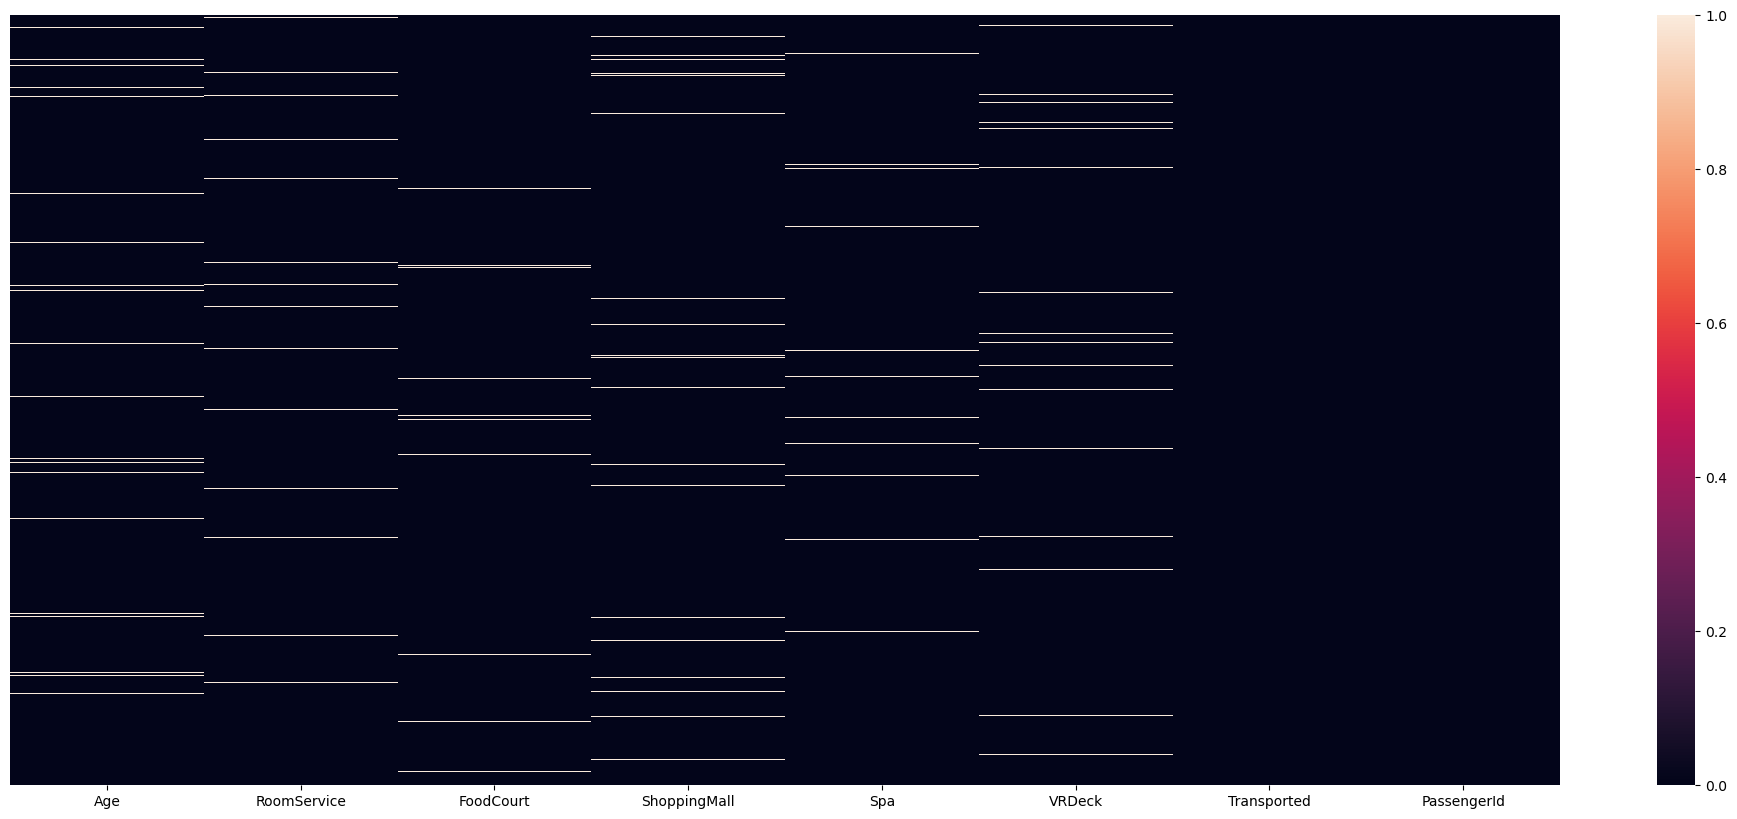

In [128]:
fig, ax = plt.subplots(figsize=(25,10))
seaborn.heatmap(data=train_dataframe.isnull(), yticklabels=False, ax=ax)

<AxesSubplot:>

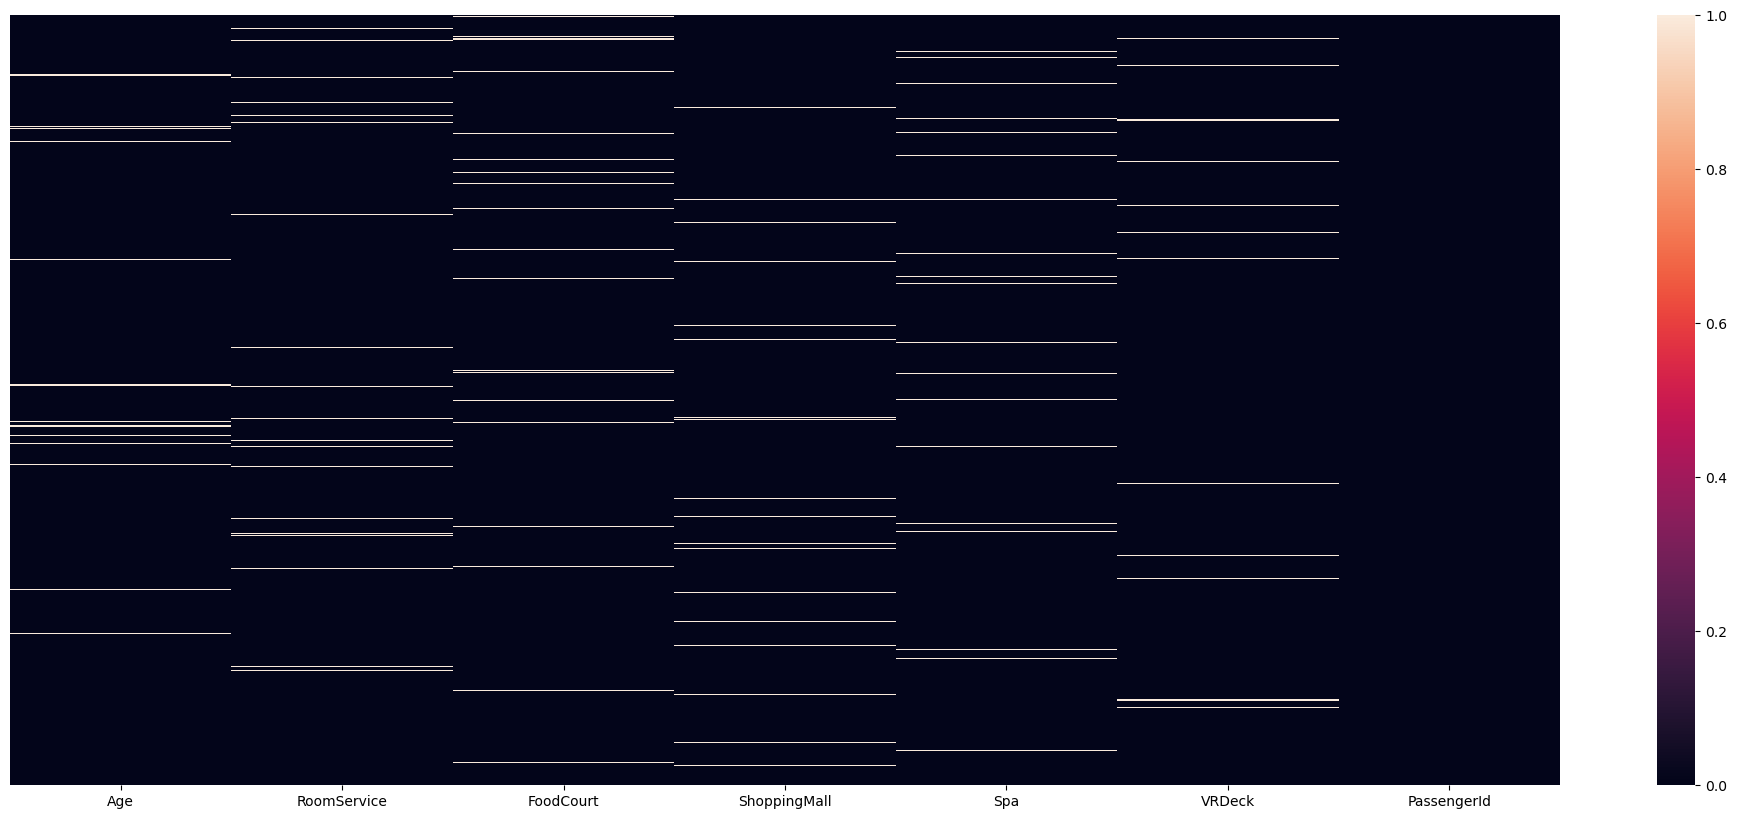

In [129]:
fig, ax = plt.subplots(figsize=(25,10))
seaborn.heatmap(data=test_dataframe.isnull(), yticklabels=False, ax=ax)

A partir daqui para não deixar o estudo muito grande e com informações repetidas so mostrarei as informações dos dados de treino, e não mais dos de teste por apresentarem as "mesmas" informações.

In [130]:
percentColumnNullValues(train_dataframe)

Age
2.0591280340503855
RoomService
2.082135051190613
FoodCourt
2.105142068330841
ShoppingMall
2.392729782583688
Spa
2.105142068330841
VRDeck
2.1626596111814105


In [131]:
train_dataframe['Age'].fillna(train_dataframe['Age'].mean(), inplace = True)
train_dataframe['RoomService'].fillna(0, inplace = True)
train_dataframe['FoodCourt'].fillna(0, inplace = True)
train_dataframe['ShoppingMall'].fillna(0, inplace = True)
train_dataframe['Spa'].fillna(0, inplace = True)
train_dataframe['VRDeck'].fillna(0, inplace = True)

test_dataframe['Age'].fillna(test_dataframe['Age'].mean(), inplace = True)
test_dataframe['RoomService'].fillna(0, inplace = True)
test_dataframe['FoodCourt'].fillna(0, inplace = True)
test_dataframe['ShoppingMall'].fillna(0, inplace = True)
test_dataframe['Spa'].fillna(0, inplace = True)
test_dataframe['VRDeck'].fillna(0, inplace = True)

In [132]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

Transported     1.000000
Age            -0.069664
FoodCourt      -0.186388
ShoppingMall   -0.227018
VRDeck         -0.347008
RoomService    -0.363899
Spa            -0.366099
Name: Transported, dtype: float64

In [133]:
test_dataframe['PassengerId'] = getPassengerIdNumber(test_dataframe['PassengerId'])
train_dataframe['PassengerId'] = getPassengerIdNumber(train_dataframe['PassengerId'])
train_dataframe[:10]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerId
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1
1,24.0,109.0,9.0,25.0,549.0,44.0,True,2
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,3
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,3
4,16.0,303.0,70.0,151.0,565.0,2.0,True,4
5,44.0,0.0,483.0,0.0,291.0,0.0,True,5
6,26.0,42.0,1539.0,3.0,0.0,0.0,True,6
7,28.0,0.0,0.0,0.0,0.0,0.0,True,6
8,35.0,0.0,785.0,17.0,216.0,0.0,True,7
9,14.0,0.0,0.0,0.0,0.0,0.0,True,8


# Treinamento do modelo

In [99]:
features = train_dataframe.drop("Transported",axis=1)
target = train_dataframe["Transported"]
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=22)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6085, 7), (2608, 7), (6085,), (2608,))

Acuracia: 76.84
Acuracia com validação cruzada media 5 exemplos 62.56


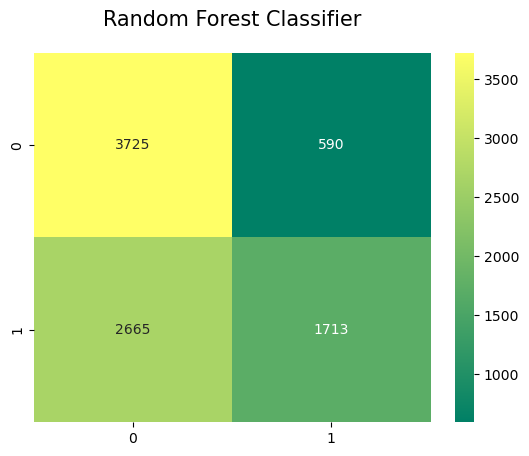

In [100]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

#n_estimators its exemples quantite that we will use in the training
RandonForestModel = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

RandonForestModel.fit(X_train,y_train)
prediction_rm=RandonForestModel.predict(X_test)
print('Acuracia:',round(accuracy_score(prediction_rm,y_test)*100,2))

kfold = KFold(n_splits=5, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(RandonForestModel,features,target,cv=5,scoring='accuracy')
print('Acuracia com validação cruzada media 5 exemplos',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(RandonForestModel,features,target,cv=5)
seaborn.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='3.0f',cmap="summer");
plt.title('Random Forest Classifier', y=1.05, size=15);

Acuracia: 73.12
Acuracia com validação cruzada media 5 exemplos: 58.44


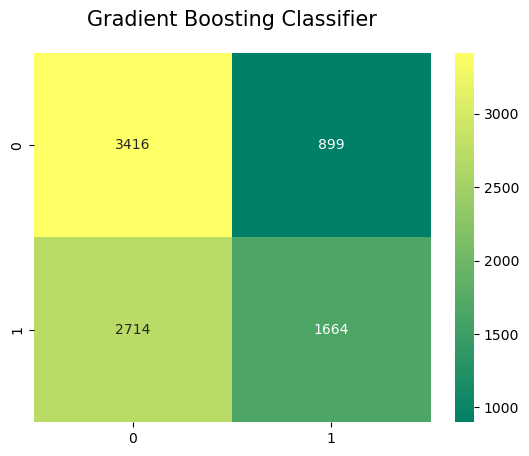

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBCmodel= GradientBoostingClassifier(n_estimators=500,
                                            max_depth=50,
                                            max_features='auto',
                                            min_samples_split=10,
                                            random_state=1,
                                            #verbose=1,
                                            validation_fraction=0.3,
                                            n_iter_no_change=1
                                           )
GradientBCmodel.fit(X_train,y_train)
prediction_gbc=GradientBCmodel.predict(X_test)
print('Acuracia:',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=5, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
five_results_cval=cross_val_score(GradientBCmodel,features,target,cv=5,scoring='accuracy')
print('Acuracia com validação cruzada media 5 exemplos:',round(five_results_cval.mean()*100,2))
y_pred = cross_val_predict(GradientBCmodel,features,target,cv=5)
seaborn.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='3.0f',cmap="summer");
plt.title('Gradient Boosting Classifier', y=1.05, size=15);

In [102]:
#train_dataframe=train_dataframe.drop("PassengerId", axis=1)
train_X = train_dataframe.drop("Transported", axis=1)#features
train_Y= train_dataframe["Transported"]#target
test_X  = test_dataframe.copy()
train_X.shape, train_Y.shape, test_X.shape

((8693, 7), (8693,), (4277, 7))

Accuracy  92.55


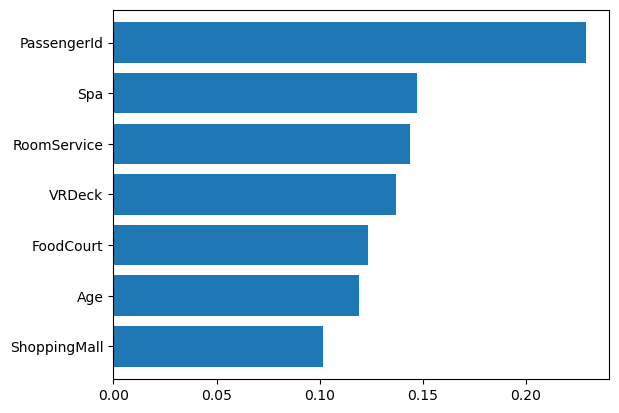

In [103]:
# Random Forests
random_forest = RandomForestClassifier(class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2',
            min_samples_leaf=2, min_samples_split=4,
            n_estimators=500, n_jobs=1,
            warm_start=True,random_state=0)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)#predições
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

pandas.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print("Accuracy ",acc_random_forest)

submission = pandas.DataFrame({
        "PassengerId": PassengerID,
        "Transported": Y_pred_rf})

submission.to_csv('MySubmissionFutureTitanicRandonForest01.csv', index=False)

Accuracy  62.79


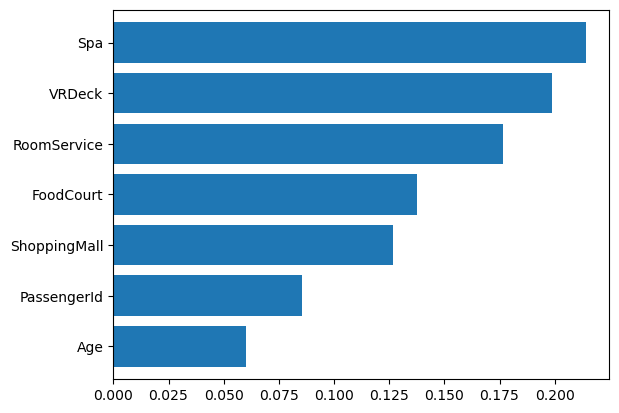

In [104]:
xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000
                      , subsample=0.7,colsample_bytree=0.7,
                      random_state=0).fit(X,y)
xgb.fit(train_X, train_Y)
Y_pred_rf = xgb.predict(test_X)#predições
xgb.score(train_X,train_Y)
acc_XGB = round(xgb.score(train_X, train_Y) * 100, 2)

pandas.Series(xgb.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print("Accuracy ", acc_XGB)

predT=[]
price = xgb.predict(test_X)
for i in range (len(price)):
    if (price[i] >= 0.45):
        predT.append('True')
    else:
        predT.append('False')
        
submission = pandas.DataFrame({
        "PassengerId": PassengerID,
        "Transported": predT})

submission.to_csv('MySubmissionFutureTitanicXGB01.csv', index=False)

## Resultados
Após confirmação no site do Kaggle foi verificado que o modelo Randon Forest obteve piores resultados com 78.48% de acertos contra 79.30% do XGB

## Aperfeiçoamento do modelo
Conforme verificado tivemos algum problemas quanto a algumas variaveis principalmente no modelo XGB que demonstrou uma baixa acuracia para idade, identificação do passageiro, compras no shopping e alimentação, talvez estas variaveis não sejam importantes porem iremos leva-las em conta a principio e iremos procurar uma forma de melhorar seus resultados, tambem foi verificado que se trocarmos a media pelo valor 0 para as variaveis Spa, VRDeck,RoomService, FoodCourt e ShoppingMall a precisão do XGB sai de 79.30% para 79.51%.

## Proximos passos
Seria muito interessante agora que conseguimos melhorar o resultado sem nenhum balanceamento dos dados que o façamos, sera testadas ambas opçoes tanto de pegar a menor quantidade de dados quanto a de gerar dados para balancear os dados, agora iremos fazer este balanceamento, que sera feito por meio da nova variavel HomePlanet que sera adicionada ao dataset

# Model 3 - Balanceado os dados
Os dados serão balanceados com base na saida, foi utilizado o RandomOverSampler porem os resultados foram piores do que os anteriores então sera utilizado o RandomUnderSampler para verificar os resultados foram piores nos 2 casos não passando de 76.4% o que é poir em mais de 3% do ultimo resultado porem quando analisado sem o uso do balanceamento o resultado não foi tão diferente 76.642% então outra estrategia sera adotada, tambem verifiquei que talvez adicionar somente o local de saida foi ruim pois o local de destino talvez seria mais interessante, sera adicionado esta informações ao modelo 3 para rever os resultados.
Apos colocar o destino o modelo de aprendizado obteve os seguintes resultados no treino:

RF : Acuracia: 100.0/ Acuracia com validação cruzada media 5 exemplos 68.45 /Acuracia da predição dos itens  95.39


SGB : Acuracia: 100.0/ Acuracia com validação cruzada media 5 exemplos: 63.72/Acuracia da predição dos itens 67.83



In [10]:
train_dataframe = pandas.read_csv("train.csv")
test_dataframe = pandas.read_csv("test.csv")
train_dataframe.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [11]:
imutPassengerID = test_dataframe['PassengerId'].copy()
imutPassengerID

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [12]:
print(train_dataframe.head(2),'\n\n')
print("-"*75)
print(test_dataframe.head(2))

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   

   RoomService  FoodCourt  ShoppingMall    Spa  VRDeck             Name  \
0          0.0        0.0           0.0    0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0  549.0    44.0     Juanna Vines   

   Transported  
0        False  
1         True   


---------------------------------------------------------------------------
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  
0          0.0        0.0           0.0     0.0     0.0  Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0   Lerome P

In [13]:
PassengerID = test_dataframe['PassengerId']

In [14]:
columns_test_quantitative = [i for i in test_dataframe.columns if test_dataframe.dtypes[i] != 'object']
columns_train_quantitative = [i for i in train_dataframe.columns if train_dataframe.dtypes[i] != 'object']

columns_train_quantitative.append('PassengerId')
columns_test_quantitative.append('PassengerId')

columns_train_quantitative.append('HomePlanet')
columns_test_quantitative.append('HomePlanet')

columns_train_quantitative.append('Destination')
columns_test_quantitative.append('Destination')

columns_train_quantitative=columns_train_quantitative[:len(columns_train_quantitative)]
columns_test_quantitative=columns_test_quantitative[:len(columns_test_quantitative)]
train_dataframe=train_dataframe[columns_train_quantitative]
test_dataframe=test_dataframe[columns_test_quantitative]

In [15]:
print("Amount of NaN Train Data\n")
print(nanValues(train_dataframe))
print("\nAmount of NaN Test Data\n")
print(nanValues(test_dataframe))

Amount of NaN Train Data

Percent of nan values: 1.7312780398021397

Quantite of nan values:
 Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
PassengerId       0
HomePlanet      201
Destination     182
dtype: int64
None

Amount of NaN Test Data

Percent of nan values: 1.9146338295274468

Quantite of nan values:
 Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
PassengerId       0
HomePlanet       87
Destination      92
dtype: int64
None


In [16]:
print("-----------Train DataFrame-----------")
print(train_dataframe.columns);
print("\n-----------Test DataFrame-----------")
print(test_dataframe.columns);

-----------Train DataFrame-----------
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'PassengerId', 'HomePlanet', 'Destination'],
      dtype='object')

-----------Test DataFrame-----------
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'PassengerId', 'HomePlanet', 'Destination'],
      dtype='object')


<AxesSubplot:>

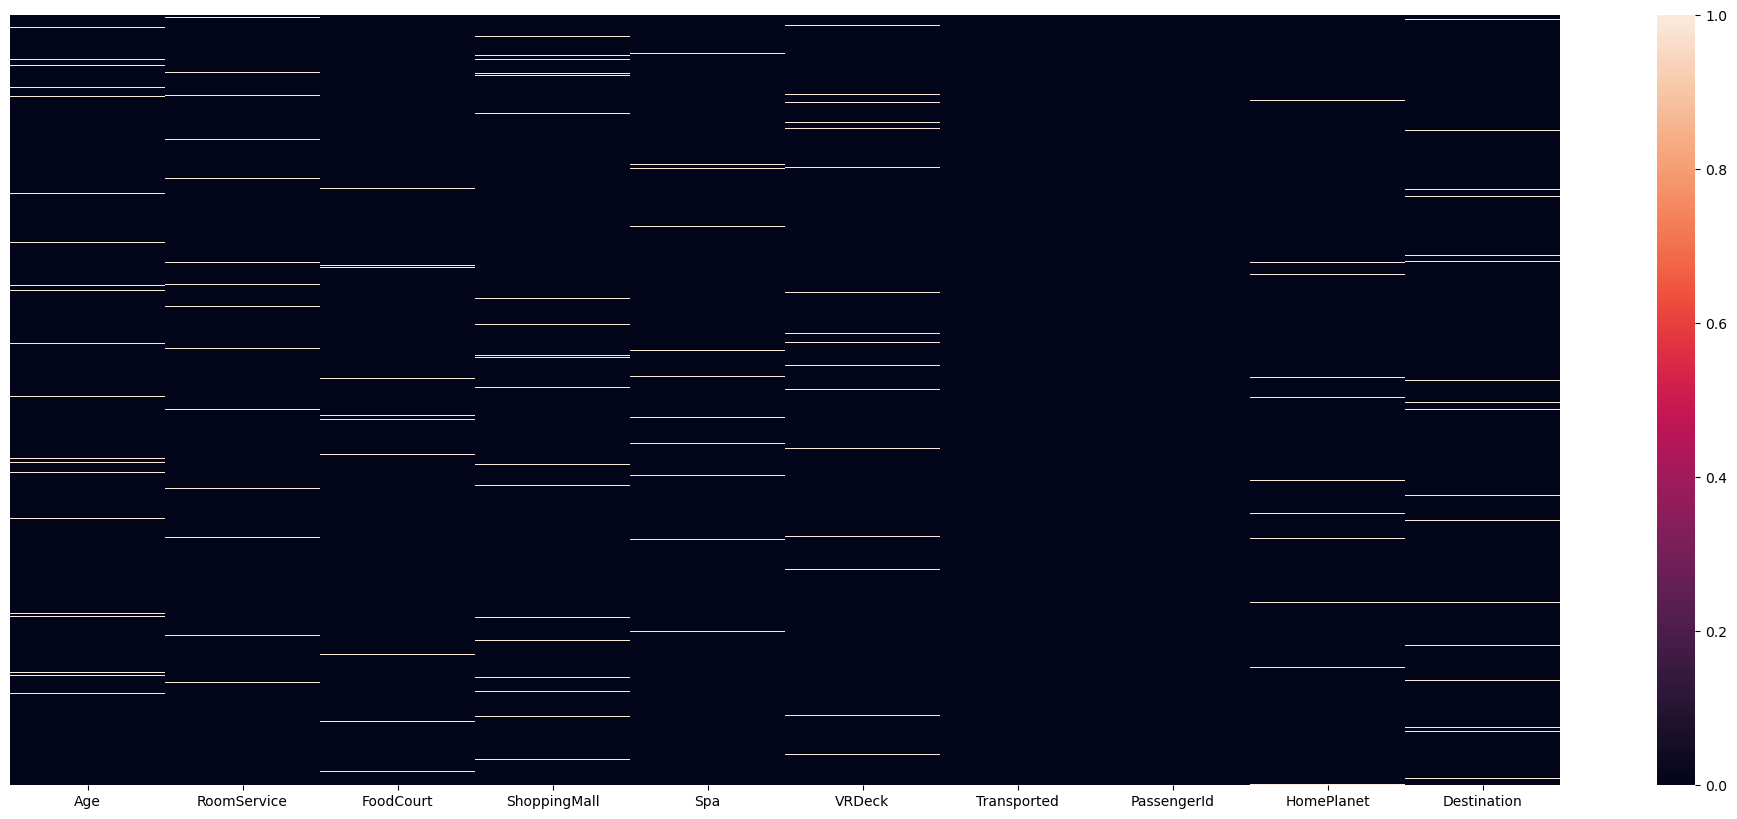

In [17]:
fig, ax = plt.subplots(figsize=(25,10))
seaborn.heatmap(data=train_dataframe.isnull(), yticklabels=False, ax=ax)

<AxesSubplot:>

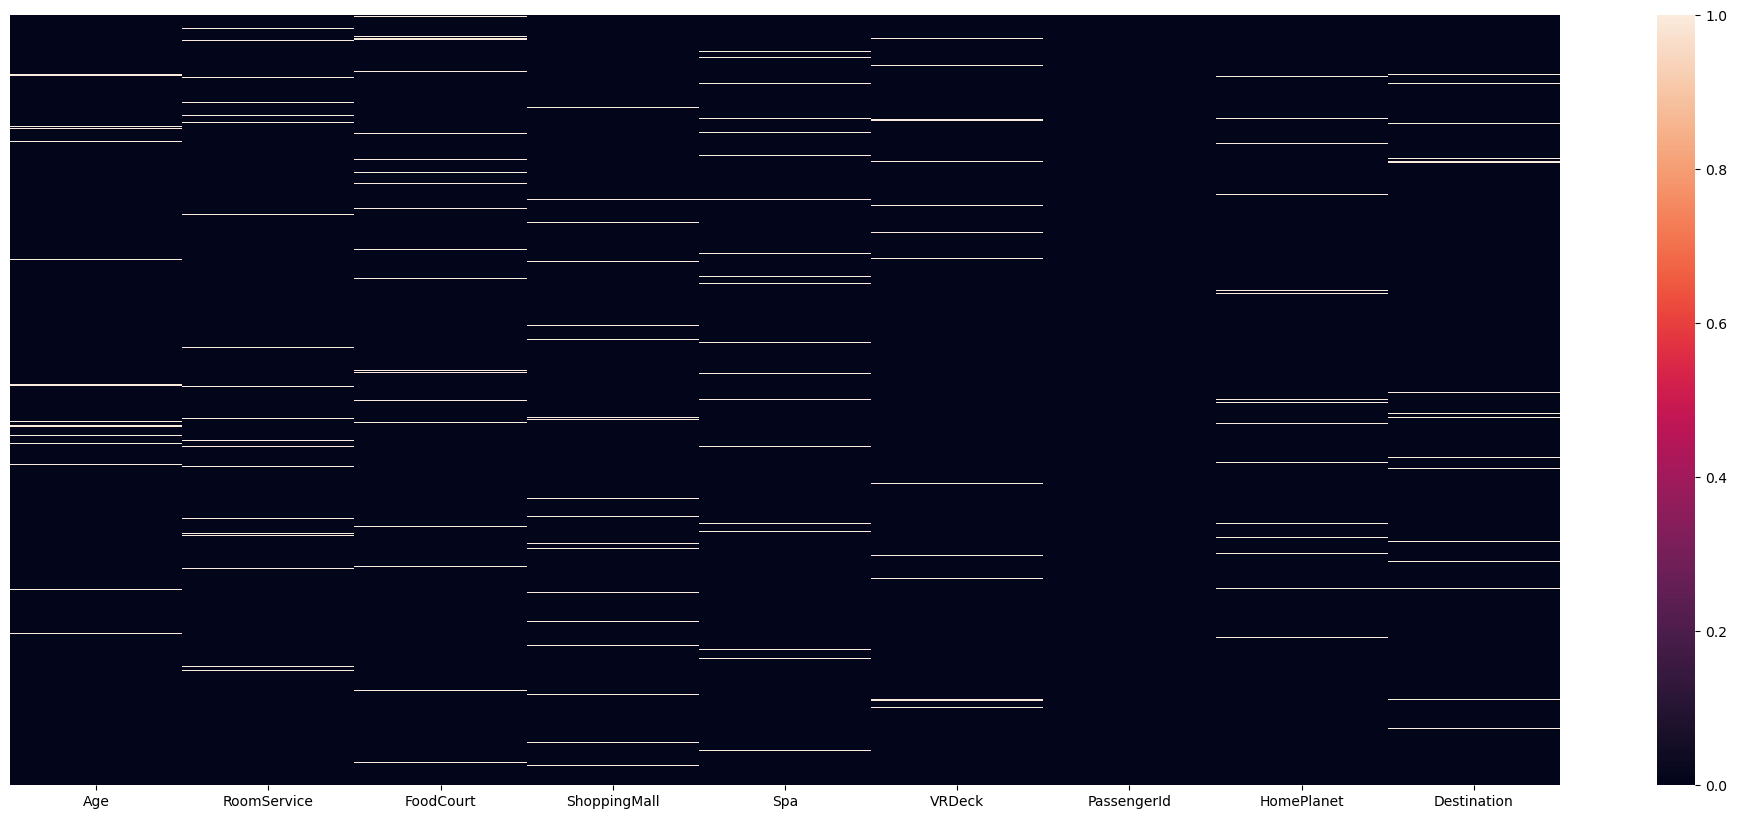

In [18]:
fig, ax = plt.subplots(figsize=(25,10))
seaborn.heatmap(data=test_dataframe.isnull(), yticklabels=False, ax=ax)

A partir daqui para não deixar o estudo muito grande e com informações repetidas so mostrarei as informações dos dados de treino, e não mais dos de teste por apresentarem as "mesmas" informações.

In [19]:
train_dataframe['Age'].fillna(train_dataframe['Age'].mean(), inplace = True)
train_dataframe['RoomService'].fillna(0, inplace = True)
train_dataframe['FoodCourt'].fillna(0, inplace = True)
train_dataframe['ShoppingMall'].fillna(0, inplace = True)
train_dataframe['Spa'].fillna(0, inplace = True)
train_dataframe['VRDeck'].fillna(0, inplace = True)

test_dataframe['Age'].fillna(test_dataframe['Age'].mean(), inplace = True)
test_dataframe['RoomService'].fillna(0, inplace = True)
test_dataframe['FoodCourt'].fillna(0, inplace = True)
test_dataframe['ShoppingMall'].fillna(0, inplace = True)
test_dataframe['Spa'].fillna(0, inplace = True)
test_dataframe['VRDeck'].fillna(0, inplace = True)

In [20]:
percentColumnNullValues(test_dataframe)

HomePlanet
2.034136076689268
Destination
2.1510404489127897


In [21]:
print(test_dataframe["HomePlanet"].mode())
print(test_dataframe["Destination"].mode())

0    Earth
Name: HomePlanet, dtype: object
0    TRAPPIST-1e
Name: Destination, dtype: object


In [22]:
train_dataframe=train_dataframe.dropna()
test_dataframe["HomePlanet"].fillna("Earth", inplace=True)
test_dataframe["Destination"].fillna("TRAPPIST-1e", inplace=True)

In [23]:
test_dataframe

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId,HomePlanet,Destination
0,27.000000,0.0,0.0,0.0,0.0,0.0,0013_01,Earth,TRAPPIST-1e
1,19.000000,0.0,9.0,0.0,2823.0,0.0,0018_01,Earth,TRAPPIST-1e
2,31.000000,0.0,0.0,0.0,0.0,0.0,0019_01,Europa,55 Cancri e
3,38.000000,0.0,6652.0,0.0,181.0,585.0,0021_01,Europa,TRAPPIST-1e
4,20.000000,10.0,0.0,635.0,0.0,0.0,0023_01,Earth,TRAPPIST-1e
...,...,...,...,...,...,...,...,...,...
4272,34.000000,0.0,0.0,0.0,0.0,0.0,9266_02,Earth,TRAPPIST-1e
4273,42.000000,0.0,847.0,17.0,10.0,144.0,9269_01,Earth,TRAPPIST-1e
4274,28.658146,0.0,0.0,0.0,0.0,0.0,9271_01,Mars,55 Cancri e
4275,28.658146,0.0,2680.0,0.0,0.0,523.0,9273_01,Europa,TRAPPIST-1e


In [24]:
unique_Cabin = train_dataframe['HomePlanet'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_Cabin])
train_dataframe['HomePlanet'] = ordinal_encoder.fit_transform(train_dataframe[['HomePlanet']])

unique_Cabin = test_dataframe['HomePlanet'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_Cabin])
test_dataframe['HomePlanet'] = ordinal_encoder.fit_transform(test_dataframe[['HomePlanet']])

unique_Cabin = train_dataframe['Destination'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_Cabin])
train_dataframe['Destination'] = ordinal_encoder.fit_transform(train_dataframe[['Destination']])

unique_Cabin = test_dataframe['Destination'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_Cabin])
test_dataframe['Destination'] = ordinal_encoder.fit_transform(test_dataframe[['Destination']])

In [25]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

Transported     1.000000
Destination     0.104299
Age            -0.073508
HomePlanet     -0.108675
FoodCourt      -0.186251
ShoppingMall   -0.225634
VRDeck         -0.342556
RoomService    -0.362700
Spa            -0.366069
Name: Transported, dtype: float64

In [26]:
percentColumnNullValues(test_dataframe)

In [27]:
def getPassengerIdNumber2(dataframe):
    var = []
    for i in (dataframe.index):
        number=dataframe[i]
        var.append(int(number[0:4]))
    return var

In [28]:
train_dataframe['PassengerId'] = getPassengerIdNumber2(train_dataframe['PassengerId'])
test_dataframe['PassengerId'] = getPassengerIdNumber2(test_dataframe['PassengerId'])

In [29]:
train_dataframe

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerId,HomePlanet,Destination
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,2,1.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,3,0.0,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,3,0.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,4,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,9276,0.0,2.0
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,9278,1.0,1.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,9279,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,9280,0.0,2.0


In [30]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

Transported     1.000000
Destination     0.104299
PassengerId     0.028922
Age            -0.073508
HomePlanet     -0.108675
FoodCourt      -0.186251
ShoppingMall   -0.225634
VRDeck         -0.342556
RoomService    -0.362700
Spa            -0.366069
Name: Transported, dtype: float64

# Treinamento do modelo

In [31]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomUnderSampler(random_state=0)
# ros.fit(train_dataframe[columns_train_quantitative], train_dataframe['HomePlanet'])
# train_dataframe_modified, target = ros.fit_resample(train_dataframe[columns_train_quantitative], train_dataframe['HomePlanet'])

In [32]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomUnderSampler(random_state=0)
# ros.fit(train_dataframe_modified[columns_train_quantitative], train_dataframe_modified['Destination'])
# train_dataframe_modified, target = ros.fit_resample(train_dataframe[columns_train_quantitative], train_dataframe['Destination'])

In [33]:
features = train_dataframe.drop("Transported",axis=1)
target = train_dataframe["Transported"]
X_train,X_test,y_train,y_test = train_test_split(train_dataframe,target,test_size=0.3,random_state=22)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5819, 10), (2495, 10), (5819,), (2495,))

Acuracia: 100.0
Acuracia com validação cruzada media 5 exemplos 68.45


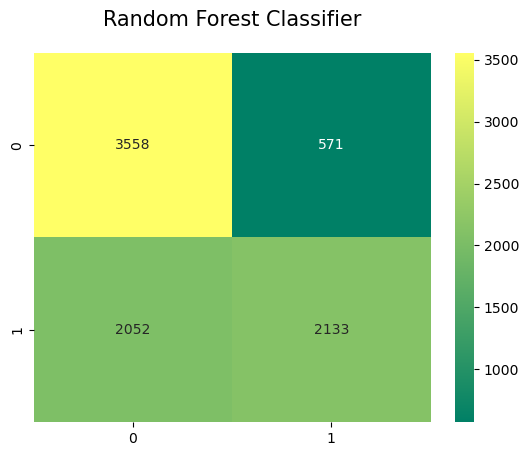

In [34]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

#n_estimators its exemples quantite that we will use in the training
RandonForestModel = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

RandonForestModel.fit(X_train,y_train)
prediction_rm=RandonForestModel.predict(X_test)
print('Acuracia:',round(accuracy_score(prediction_rm,y_test)*100,2))

kfold = KFold(n_splits=5, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(RandonForestModel,features,target,cv=5,scoring='accuracy')
print('Acuracia com validação cruzada media 5 exemplos',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(RandonForestModel,features,target,cv=5)
seaborn.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='3.0f',cmap="summer");
plt.title('Random Forest Classifier', y=1.05, size=15);

Acuracia: 100.0
Acuracia com validação cruzada media 5 exemplos: 63.72


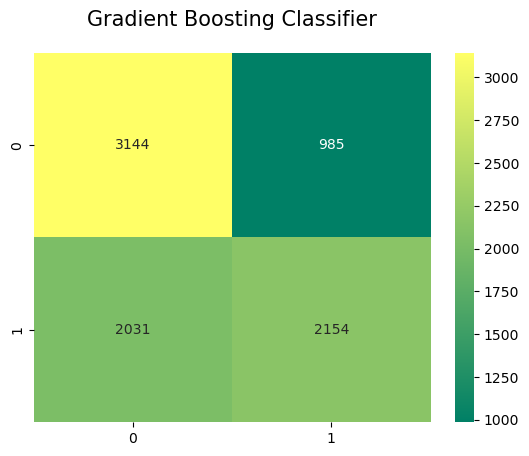

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBCmodel= GradientBoostingClassifier(n_estimators=500,
                                            max_depth=50,
                                            max_features='auto',
                                            min_samples_split=10,
                                            random_state=1,
                                            #verbose=1,
                                            validation_fraction=0.3,
                                            n_iter_no_change=1
                                           )
GradientBCmodel.fit(X_train,y_train)
prediction_gbc=GradientBCmodel.predict(X_test)
print('Acuracia:',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=5, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
five_results_cval=cross_val_score(GradientBCmodel,features,target,cv=5,scoring='accuracy')
print('Acuracia com validação cruzada media 5 exemplos:',round(five_results_cval.mean()*100,2))
y_pred = cross_val_predict(GradientBCmodel,features,target,cv=5)
seaborn.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='3.0f',cmap="summer");
plt.title('Gradient Boosting Classifier', y=1.05, size=15);

In [36]:
y_pred

array([False, False, False, ...,  True, False,  True])

In [37]:
#train_dataframe=train_dataframe.drop("PassengerId", axis=1)
train_X = train_dataframe.drop("Transported", axis=1)#features
train_Y= train_dataframe["Transported"]#target
test_X  = test_dataframe.copy()
train_X.shape, train_Y.shape, test_X.shape

((8314, 9), (8314,), (4277, 9))

Accuracy  95.39


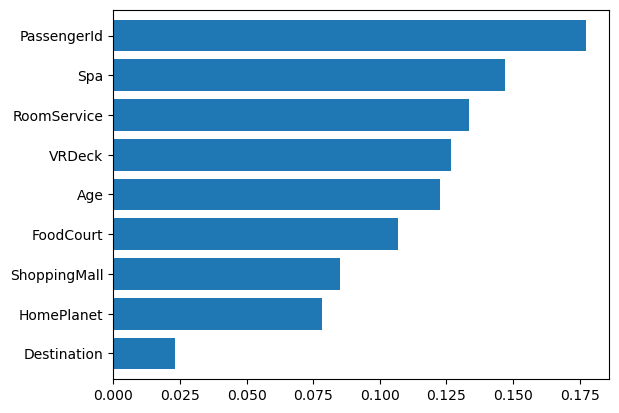

In [38]:
# Random Forests
random_forest = RandomForestClassifier(class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2',
            min_samples_leaf=2, min_samples_split=4,
            n_estimators=500, n_jobs=1,
            warm_start=True,random_state=0)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)#predições
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

pandas.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print("Accuracy ",acc_random_forest)

submission = pandas.DataFrame({
        "PassengerId": imutPassengerID,
        "Transported": Y_pred_rf})

submission.to_csv('MySubmissionFutureTitanicRandonForest03.csv', index=False)

Accuracy  67.83


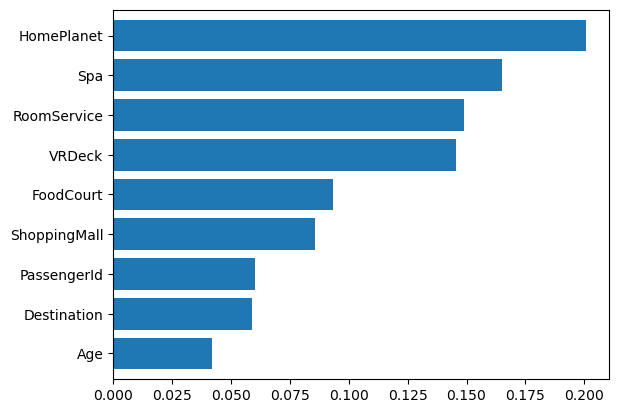

In [39]:
xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000
                      , subsample=0.7,colsample_bytree=0.7,
                      random_state=0).fit(train_X, train_Y)
xgb.fit(train_X, train_Y)
Y_pred_rf = xgb.predict(test_X)#predições
xgb.score(train_X,train_Y)
acc_XGB = round(xgb.score(train_X, train_Y) * 100, 2)

pandas.Series(xgb.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print("Accuracy ", acc_XGB)

predT=[]
price = xgb.predict(test_X)
for i in range (len(price)):
    if (price[i] >= 0.45):
        predT.append('True')
    else:
        predT.append('False')
        
submission = pandas.DataFrame({
        "PassengerId": imutPassengerID,
        "Transported": predT})

submission.to_csv('MySubmissionFutureTitanicXGB03.csv', index=False)

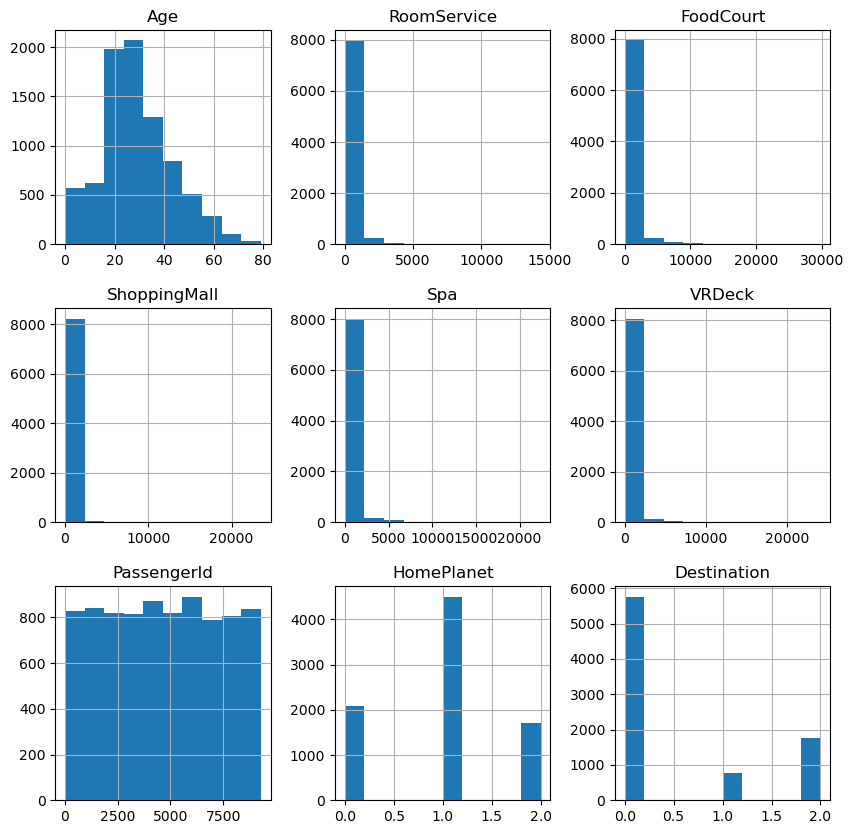

In [40]:
train_dataframe[columns_train_quantitative].hist(figsize=(10,10))
#sns.displot(train[num_cols])
plt.show()

# Model 4 - Juntando todos valores da variavel Custo e adicionando outras variaveis ao conjunto de dados
foram adicionadas mais duas variaveis a CryoSleep e com a itenção de dropar a coluna PassengerId foi adicionado a variavel Cabin pois embora a PassengerId informe se as pessoas estão juntas a coluna Cabin informa onde cada uma esta, possibilitando que haja um maior detalhamento dos dados, diferença esta que faz pensar, por que não usa-la no dataset que deu o melhor resultado ate agora para verificar se obtenho um resultado melhor..

In [40]:
train_dataframe = pandas.read_csv("train.csv")
test_dataframe = pandas.read_csv("test.csv")
train_dataframe.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [41]:
columns_test_quantitative = [i for i in test_dataframe.columns if test_dataframe.dtypes[i] != 'object']
columns_train_quantitative = [i for i in train_dataframe.columns if train_dataframe.dtypes[i] != 'object']

columns_train_quantitative.append('PassengerId')
columns_test_quantitative.append('PassengerId')

columns_train_quantitative.append('HomePlanet')
columns_test_quantitative.append('HomePlanet')

columns_train_quantitative.append('Destination')
columns_test_quantitative.append('Destination')

columns_train_quantitative.append('CryoSleep')
columns_test_quantitative.append('CryoSleep')

columns_train_quantitative.append('Cabin')
columns_test_quantitative.append('Cabin')

columns_train_quantitative=columns_train_quantitative[:len(columns_train_quantitative)]
columns_test_quantitative=columns_test_quantitative[:len(columns_test_quantitative)]
train_dataframe=train_dataframe[columns_train_quantitative]
test_dataframe=test_dataframe[columns_test_quantitative]

In [42]:
imutPassengerID = test_dataframe['PassengerId'].copy()

In [43]:
print("Treino")
print(percentColumnNullValues(train_dataframe))
print("\n\nTest")
print(percentColumnNullValues(test_dataframe))

Treino
Age
2.0591280340503855
RoomService
2.082135051190613
FoodCourt
2.105142068330841
ShoppingMall
2.392729782583688
Spa
2.105142068330841
VRDeck
2.1626596111814105
HomePlanet
2.312205222592891
Destination
2.093638559760727
CryoSleep
2.4962613597147127
Cabin
2.289198205452663
None


Test
Age
2.127659574468085
RoomService
1.917231704465747
FoodCourt
2.4783726911386488
ShoppingMall
2.2913256955810146
Spa
2.3614683189151275
VRDeck
1.8704699555763384
HomePlanet
2.034136076689268
Destination
2.1510404489127897
CryoSleep
2.1744213233574934
Cabin
2.338087444470423
None


In [44]:
train_dataframe['TotalSpent']=train_dataframe['ShoppingMall']+train_dataframe['VRDeck']+train_dataframe['RoomService']+train_dataframe['Spa']+train_dataframe['FoodCourt']
test_dataframe['TotalSpent']=test_dataframe['ShoppingMall']+test_dataframe['VRDeck']+test_dataframe['RoomService']+test_dataframe['Spa']+test_dataframe['FoodCourt']

In [45]:
train_dataframe=train_dataframe.drop(['ShoppingMall', 'VRDeck','RoomService','Spa','FoodCourt'], axis=1)
test_dataframe=test_dataframe.drop(['ShoppingMall', 'VRDeck','RoomService','Spa','FoodCourt'], axis=1)

In [46]:
train_dataframe[['CryoSleep','Transported']]

,CryoSleep,Transported
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
8688,False,False
8689,True,False
8690,False,True
8691,False,False


In [47]:
train_dataframe['CryoSleep'] = pandas.get_dummies(train_dataframe['CryoSleep'])[1]

In [48]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

Transported    1.000000
CryoSleep      0.460132
Age           -0.071029
TotalSpent    -0.413694
Name: Transported, dtype: float64

In [49]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

Transported    1.000000
CryoSleep      0.460132
Age           -0.071029
TotalSpent    -0.413694
Name: Transported, dtype: float64

<AxesSubplot:>

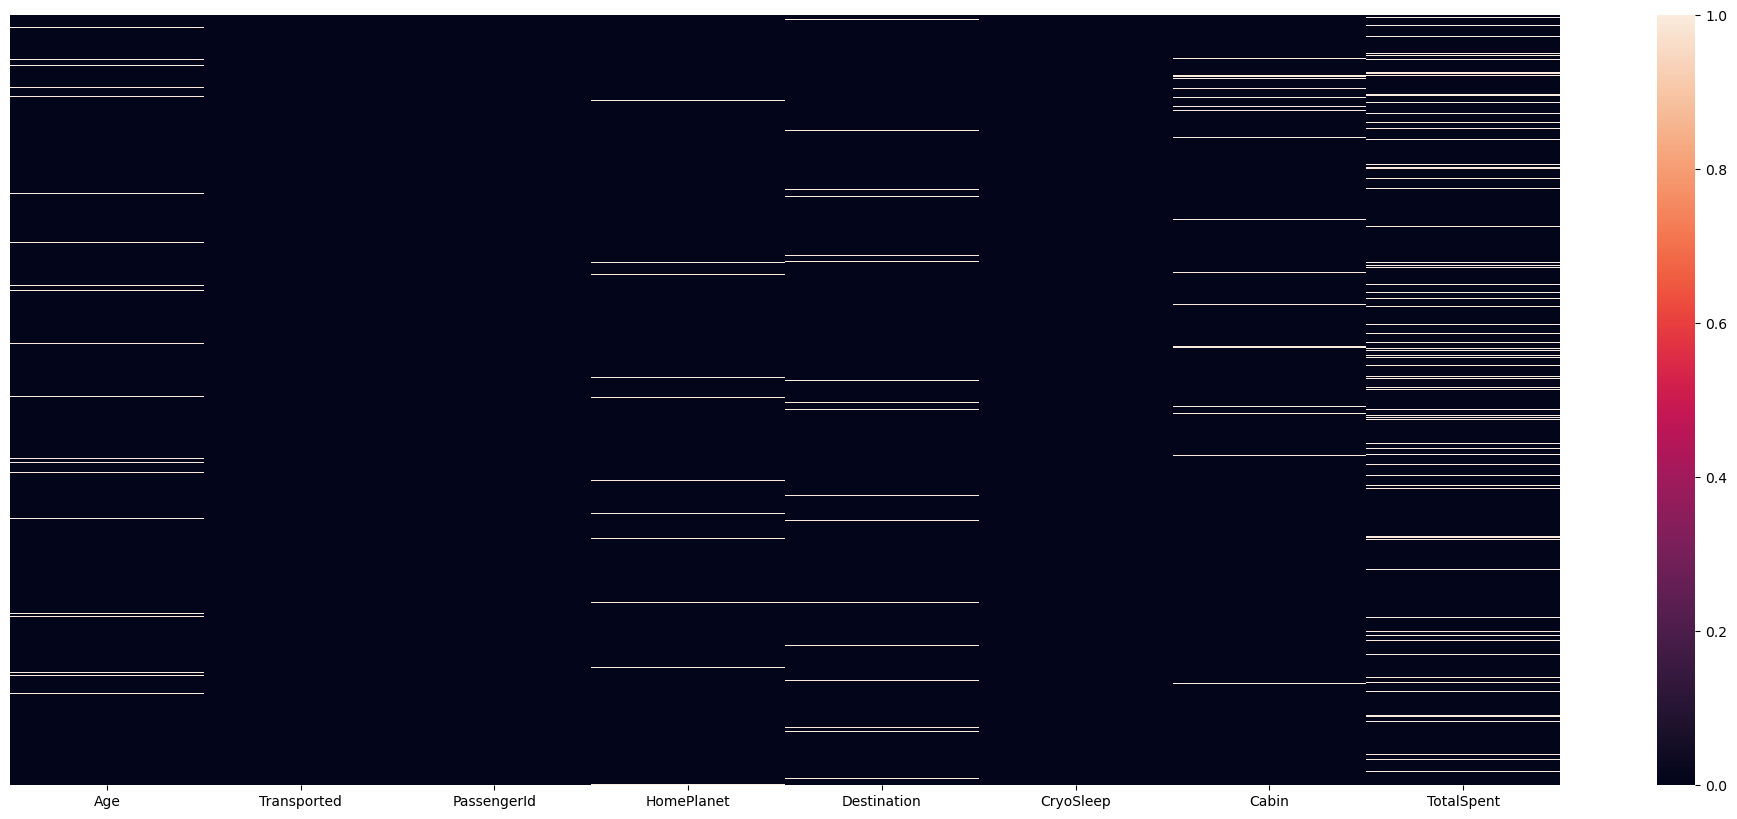

In [50]:
fig, ax = plt.subplots(figsize=(25,10))
seaborn.heatmap(data=train_dataframe.isnull(), yticklabels=False, ax=ax)

A partir daqui para não deixar o estudo muito grande e com informações repetidas so mostrarei as informações dos dados de treino, e não mais dos de teste por apresentarem as "mesmas" informações.

In [51]:
train_dataframe['Age'].fillna(train_dataframe['Age'].mean(), inplace = True)
test_dataframe['Age'].fillna(test_dataframe['Age'].mean(), inplace = True)

In [52]:
print(percentColumnNullValues(test_dataframe))
print(percentColumnNullValues(train_dataframe))

HomePlanet
2.034136076689268
Destination
2.1510404489127897
CryoSleep
2.1744213233574934
Cabin
2.338087444470423
TotalSpent
10.638297872340425
None
HomePlanet
2.312205222592891
Destination
2.093638559760727
Cabin
2.289198205452663
TotalSpent
10.445185781663408
None


In [53]:
train_dataframe=train_dataframe.dropna()
test_dataframe["HomePlanet"].fillna("Earth", inplace=True)
test_dataframe["Destination"].fillna("TRAPPIST-1e", inplace=True)
test_dataframe["TotalSpent"].fillna(0 , inplace=True)

In [54]:
test_dataframe.head()

,Age,PassengerId,HomePlanet,Destination,CryoSleep,Cabin,TotalSpent
0,27.0,0013_01,Earth,TRAPPIST-1e,True,G/3/S,0.0
1,19.0,0018_01,Earth,TRAPPIST-1e,False,F/4/S,2832.0
2,31.0,0019_01,Europa,55 Cancri e,True,C/0/S,0.0
3,38.0,0021_01,Europa,TRAPPIST-1e,False,C/1/S,7418.0
4,20.0,0023_01,Earth,TRAPPIST-1e,False,F/5/S,645.0


In [55]:
temp_var = train_dataframe['HomePlanet'].unique()
ordinal_encoder = OrdinalEncoder(categories=[temp_var])
train_dataframe['HomePlanet'] = ordinal_encoder.fit_transform(train_dataframe[['HomePlanet']])

temp_var = test_dataframe['HomePlanet'].unique()
ordinal_encoder = OrdinalEncoder(categories=[temp_var])
test_dataframe['HomePlanet'] = ordinal_encoder.fit_transform(test_dataframe[['HomePlanet']])

temp_var = train_dataframe['Destination'].unique()
ordinal_encoder = OrdinalEncoder(categories=[temp_var])
train_dataframe['Destination'] = ordinal_encoder.fit_transform(train_dataframe[['Destination']])

temp_var = test_dataframe['Destination'].unique()
ordinal_encoder = OrdinalEncoder(categories=[temp_var])
test_dataframe['Destination'] = ordinal_encoder.fit_transform(test_dataframe[['Destination']])

In [56]:
def getPassengerIdNumber2(dataframe):
    var = []
    for i in (dataframe.index):
        number=dataframe[i]
        var.append(int(number[0:4]))
    return var
train_dataframe['PassengerId'] = getPassengerIdNumber2(train_dataframe['PassengerId'])
test_dataframe['PassengerId'] = getPassengerIdNumber2(test_dataframe['PassengerId'])

In [57]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

Transported    1.000000
CryoSleep      0.450960
Destination    0.114730
PassengerId    0.026350
Age           -0.079528
HomePlanet    -0.110956
TotalSpent    -0.410975
Name: Transported, dtype: float64

In [58]:
test_dataframe['CryoSleep'].fillna(False, inplace=True)
test_dataframe['CryoSleep']

0        True
1       False
2        True
3       False
4       False
        ...  
4272     True
4273    False
4274     True
4275    False
4276     True
Name: CryoSleep, Length: 4277, dtype: bool

In [59]:
test_dataframe['CryoSleep']=pandas.get_dummies(test_dataframe['CryoSleep'])[1]
train_dataframe['CryoSleep']=pandas.get_dummies(train_dataframe['CryoSleep'])[1]
train_dataframe

,Age,Transported,PassengerId,HomePlanet,Destination,CryoSleep,Cabin,TotalSpent
0,39.0,False,1,0.0,0.0,0,B/0/P,0.0
1,24.0,True,2,1.0,0.0,0,F/0/S,736.0
2,58.0,False,3,0.0,0.0,0,A/0/S,10383.0
3,33.0,False,3,0.0,0.0,0,A/0/S,5176.0
4,16.0,True,4,1.0,0.0,0,F/1/S,1091.0
...,...,...,...,...,...,...,...,...
8688,41.0,False,9276,0.0,2.0,0,A/98/P,8536.0
8689,18.0,False,9278,1.0,1.0,1,G/1499/S,0.0
8690,26.0,True,9279,1.0,0.0,0,G/1500/S,1873.0
8691,32.0,False,9280,0.0,2.0,0,E/608/S,4637.0


In [60]:
train_dataframe[train_dataframe["TotalSpent"] >= 10000] = 10000
train_dataframe.drop(train_dataframe[train_dataframe["Age"] >= 65].index, inplace=True)

In [62]:
test_dataframe['Cabin'].mode()

0    G/160/P
Name: Cabin, dtype: object

In [61]:
test_dataframe['Cabin'].fillna('G/160/P', inplace=True)

In [63]:
print("Treino")
print(percentColumnNullValues(train_dataframe))
print("\n\nTest")
print(percentColumnNullValues(test_dataframe))

Treino
None


Test
None


In [64]:
# Transformar em função
var = train_dataframe.loc[:,"Cabin"].str.split("/",expand=True)
train_dataframe['CabinLetter'] = var[0]
train_dataframe['CabinNumber'] = var[1]
train_dataframe['CabinSide'] = var[2]
train_dataframe.drop(['Cabin'], axis=1, inplace=True)

var = test_dataframe.loc[:,"Cabin"].str.split("/",expand=True)
test_dataframe['CabinLetter'] = var[0]
test_dataframe['CabinNumber'] = var[1]
test_dataframe['CabinSide'] = var[2]
test_dataframe.drop(['Cabin'], axis=1, inplace=True)

unique_Cabin = train_dataframe['CabinLetter'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_Cabin])
train_dataframe['CabinLetter'] = ordinal_encoder.fit_transform(train_dataframe[['CabinLetter']])
unique_Cabin = test_dataframe['CabinLetter'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_Cabin])
test_dataframe['CabinLetter'] = ordinal_encoder.fit_transform(test_dataframe[['CabinLetter']])

unique_Cabin = train_dataframe['CabinNumber'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_Cabin])
train_dataframe['CabinNumber'] = ordinal_encoder.fit_transform(train_dataframe[['CabinNumber']])
unique_Cabin = test_dataframe['CabinNumber'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_Cabin])
test_dataframe['CabinNumber'] = ordinal_encoder.fit_transform(test_dataframe[['CabinNumber']])

unique_Cabin = train_dataframe['CabinSide'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_Cabin])
train_dataframe['CabinSide'] = ordinal_encoder.fit_transform(train_dataframe[['CabinSide']])
unique_Cabin = test_dataframe['CabinSide'].unique()
ordinal_encoder = OrdinalEncoder(categories=[unique_Cabin])
test_dataframe['CabinSide'] = ordinal_encoder.fit_transform(test_dataframe[['CabinSide']])

In [65]:
train_dataframe

,Age,Transported,PassengerId,HomePlanet,Destination,CryoSleep,TotalSpent,CabinLetter,CabinNumber,CabinSide
0,39.0,False,1,0.0,0.0,0,0.0,0.0,0.0,0.0
1,24.0,True,2,1.0,0.0,0,736.0,1.0,0.0,1.0
3,33.0,False,3,0.0,0.0,0,5176.0,2.0,0.0,1.0
4,16.0,True,4,1.0,0.0,0,1091.0,1.0,1.0,1.0
5,44.0,True,5,1.0,1.0,0,774.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8688,41.0,False,9276,0.0,2.0,0,8536.0,2.0,86.0,0.0
8689,18.0,False,9278,1.0,1.0,1,0.0,3.0,1767.0,1.0
8690,26.0,True,9279,1.0,0.0,0,1873.0,3.0,1487.0,1.0
8691,32.0,False,9280,0.0,2.0,0,4637.0,4.0,1768.0,1.0


In [66]:
print("Treino")
print(percentColumnNullValues(train_dataframe))
print("\n\nTest")
print(percentColumnNullValues(test_dataframe))

Treino
None


Test
None


In [67]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

AttributeError: 'DataFrame' object has no attribute 'Transported'

# Aprendizado de maquina

In [822]:
features = train_dataframe.drop("Transported",axis=1)
target = train_dataframe["Transported"]
X_train,X_test,y_train,y_test = train_test_split(train_dataframe,target,test_size=0.3,random_state=22)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4915, 10), (2107, 10), (4915,), (2107,))

In [823]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

#n_estimators its exemples quantite that we will use in the training
RandonForestModel = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

RandonForestModel.fit(X_train,y_train)
prediction_rm=RandonForestModel.predict(X_test)
print('Acuracia:',round(accuracy_score(prediction_rm,y_test)*100,2))

kfold = KFold(n_splits=5, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(RandonForestModel,features,target,cv=5,scoring='accuracy')
print('Acuracia com validação cruzada media 5 exemplos',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(RandonForestModel,features,target,cv=5)
seaborn.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='3.0f',cmap="summer");
plt.title('Random Forest Classifier', y=1.05, size=15);

ValueError: Unknown label type: 'unknown'

In [824]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBCmodel= GradientBoostingClassifier(n_estimators=500,
                                            max_depth=50,
                                            max_features='auto',
                                            min_samples_split=10,
                                            random_state=1,
                                            #verbose=1,
                                            validation_fraction=0.3,
                                            n_iter_no_change=1
                                           )
GradientBCmodel.fit(X_train,y_train)
prediction_gbc=GradientBCmodel.predict(X_test)
print('Acuracia:',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=5, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
five_results_cval=cross_val_score(GradientBCmodel,features,target,cv=5,scoring='accuracy')
print('Acuracia com validação cruzada media 5 exemplos:',round(five_results_cval.mean()*100,2))
y_pred = cross_val_predict(GradientBCmodel,features,target,cv=5)
seaborn.heatmap(confusion_matrix(target,y_pred),annot=True,fmt='3.0f',cmap="summer");
plt.title('Gradient Boosting Classifier', y=1.05, size=15);

ValueError: Unknown label type: 'unknown'

In [720]:
#train_dataframe=train_dataframe.drop("PassengerId", axis=1)
train_X = train_dataframe.drop("Transported", axis=1)#features
train_Y= train_dataframe["Transported"]#target
test_X  = test_dataframe.copy()
train_X.shape, train_Y.shape, test_X.shape

((7022, 9), (7022,), (4277, 9))

Accuracy  97.27


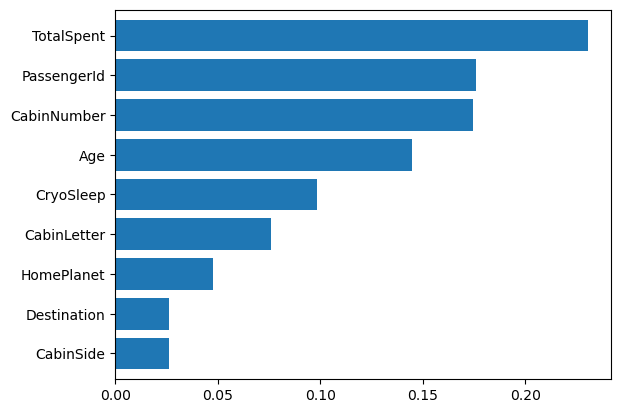

In [721]:
# Random Forests
random_forest = RandomForestClassifier(class_weight=None, criterion='entropy',
            max_depth=None, max_features='log2',
            min_samples_leaf=2, min_samples_split=4,
            n_estimators=500, n_jobs=1,
            warm_start=True,random_state=0)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)#predições
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

pandas.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print("Accuracy ",acc_random_forest)

submission = pandas.DataFrame({
        "PassengerId": imutPassengerID,
        "Transported": Y_pred_rf})

submission.to_csv('MySubmissionFutureTitanicRandonForest04.csv', index=False)

Accuracy  66.31


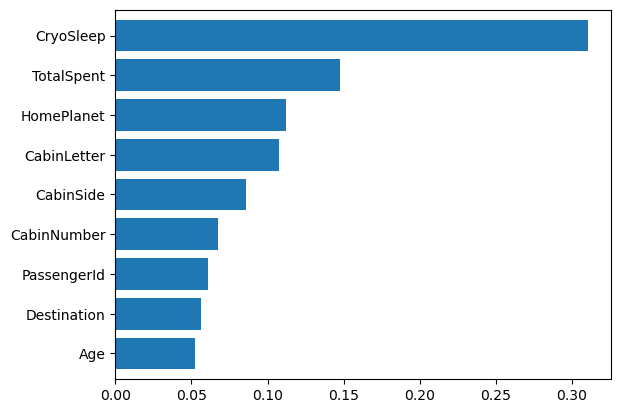

In [722]:
xgb = xg.XGBRegressor(learning_rate=0.01,n_estimators=2000,
                      subsample=0.7,colsample_bytree=0.7,
                      random_state=0).fit(train_X, train_Y)
xgb.fit(train_X, train_Y)
Y_pred_rf = xgb.predict(test_X)#predições
xgb.score(train_X,train_Y)
acc_XGB = round(xgb.score(train_X, train_Y) * 100, 2)

pandas.Series(xgb.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print("Accuracy ", acc_XGB)

predT=[]
price = xgb.predict(test_X)
for i in range (len(price)):
    if (price[i] >= 0.45):
        predT.append('True')
    else:
        predT.append('False')
        
submission = pandas.DataFrame({
        "PassengerId": imutPassengerID,
        "Transported": predT})

submission.to_csv('MySubmissionFutureTitanicXGB04.csv', index=False)

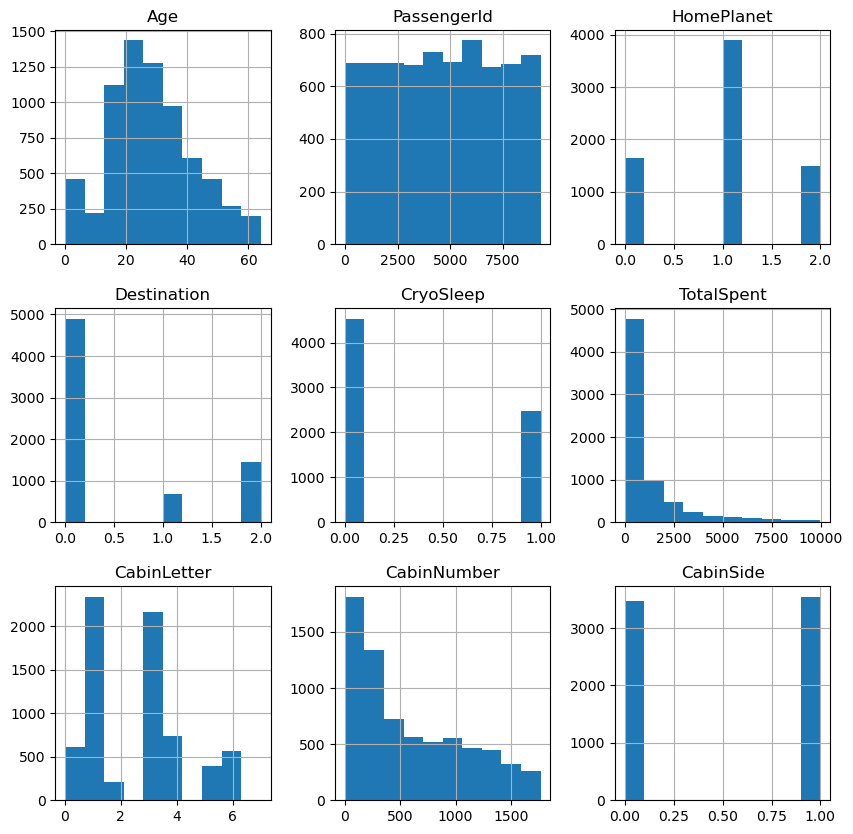

In [723]:
train_dataframe.hist(figsize=(10,10))
#sns.displot(train[num_cols])
plt.show()

In [688]:
train_dataframe.corr(method='spearman').Transported.sort_values(ascending=False)

Transported    1.000000
CryoSleep      0.450218
Destination    0.119856
CabinSide      0.107866
PassengerId    0.029671
CabinLetter   -0.023190
CabinNumber   -0.045749
Age           -0.075537
HomePlanet    -0.121716
TotalSpent    -0.412590
Name: Transported, dtype: float64